In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_data_path = '../dataset/testSet.txt'

In [3]:
with open(test_data_path) as f:
    data_mat = []
    labels = []
    for line in f.readlines():
        line = line.strip().split()
        data_mat.append([float(line[0]), float(line[1])])
        labels.append(int(line[2]))
    data_arr = np.array(data_mat)
    
print(data_arr)
print(labels)

[[-1.7612000e-02  1.4053064e+01]
 [-1.3956340e+00  4.6625410e+00]
 [-7.5215700e-01  6.5386200e+00]
 [-1.3223710e+00  7.1528530e+00]
 [ 4.2336300e-01  1.1054677e+01]
 [ 4.0670400e-01  7.0673350e+00]
 [ 6.6739400e-01  1.2741452e+01]
 [-2.4601500e+00  6.8668050e+00]
 [ 5.6941100e-01  9.5487550e+00]
 [-2.6632000e-02  1.0427743e+01]
 [ 8.5043300e-01  6.9203340e+00]
 [ 1.3471830e+00  1.3175500e+01]
 [ 1.1768130e+00  3.1670200e+00]
 [-1.7818710e+00  9.0979530e+00]
 [-5.6660600e-01  5.7490030e+00]
 [ 9.3163500e-01  1.5895050e+00]
 [-2.4205000e-02  6.1518230e+00]
 [-3.6453000e-02  2.6909880e+00]
 [-1.9694900e-01  4.4416500e-01]
 [ 1.0144590e+00  5.7543990e+00]
 [ 1.9852980e+00  3.2306190e+00]
 [-1.6934530e+00 -5.5754000e-01]
 [-5.7652500e-01  1.1778922e+01]
 [-3.4681100e-01 -1.6787300e+00]
 [-2.1244840e+00  2.6724710e+00]
 [ 1.2179160e+00  9.5970150e+00]
 [-7.3392800e-01  9.0986870e+00]
 [-3.6420010e+00 -1.6180870e+00]
 [ 3.1598500e-01  3.5239530e+00]
 [ 1.4166140e+00  9.6192320e+00]
 [-3.86323

In [4]:
x_0 = np.array([])
x_1 = np.array([])
y_0 = np.array([])
y_1 = np.array([])

for i in range(len(labels)):
    if labels[i] == 0:
        x_0 = np.append(x_0, data_arr[i, 0])
        y_0 = np.append(y_0, data_arr[i, 1])
    else:
        x_1 = np.append(x_1, data_arr[i, 0])
        y_1 = np.append(y_1, data_arr[i, 1])
        
print(x_0, y_0)

[-0.017612 -0.752157 -1.322371  0.423363  0.667394  0.569411 -0.026632
  1.347183 -1.781871 -0.576525  1.217916 -0.733928  1.416614  1.224863
  0.275221  0.470575 -1.889567 -1.527893 -1.185247 -0.618787 -1.237728
 -0.959885  0.492911  0.184992 -0.355715 -0.397822  0.824839 -0.344008
 -0.918801 -0.007194  0.356107  0.342578  1.296683  0.475487 -0.783277
  0.074798 -0.102781  0.518389  1.015399 -1.510047  1.821096  1.400102
  1.825662  0.197445  0.761349  1.38861   0.317029] [14.053064  6.53862   7.152853 11.054677 12.741452  9.548755 10.427743
 13.1755    9.097953 11.778922  9.597015  9.098687  9.619232 11.58736
  9.543647  9.332488  9.542662 12.150579 11.309318 10.320986 10.549033
 11.555336 10.993324  8.721488 10.325976  8.058397 13.730343 10.717485
 11.560217  9.075792 12.447863 12.281162 11.607559 12.040035 11.009725
 11.02365  13.763651  9.887035  7.571882  6.061992 10.28399  12.628781
 12.693808  9.744638 10.693862  9.341997 14.739025]


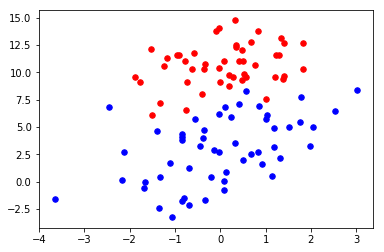

In [5]:
plt.scatter(x_0, y_0, s=30, c='red')
plt.scatter(x_1, y_1, s=30, c='blue')
plt.show()

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [7]:
labels = np.mat(labels)
print(labels.shape)
print(labels.transpose().shape)
print(labels.T.shape)

(1, 100)
(100, 1)
(100, 1)


In [8]:
print(data_arr.shape)
print(np.mat(data_arr).shape)

(100, 2)
(100, 2)


分割曲线：
$y = w^T*x+b = w_1*x_1 + w_2*x_2 + w_3$

In [9]:
def gradAscent(data, label, iters=500):
    m,n = data.shape
    data_mat = np.insert(data, 0, np.ones(1), axis=1)
    # print(data_mat)
    label_mat = np.mat(label).T 
    alpha = 0.001
    weights = np.ones((n+1,1))
    for i in range(iters):
        h = sigmoid(np.dot(data_mat, weights))
        error = label_mat - h
        weights += alpha * data_mat.T * error
    return weights

In [10]:
weights = gradAscent(data_arr, labels)
print(weights)

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


(60,)
(60,)


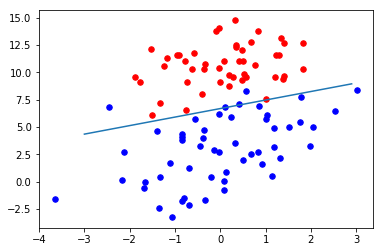

In [11]:
plt.scatter(x_0, y_0, s=30, c='red')
plt.scatter(x_1, y_1, s=30, c='blue')
x = np.arange(-3, 3, 0.1)
y = (-weights[0]-weights[1] * x )/weights[2]
print(x.shape)
print(y.shape)
plt.plot(x, y)
plt.show()

In [12]:
# 随机梯度上升
def stocGradAscent(data, label, iters=100):
    label = np.array(label).flatten()
    data_mat = np.insert(data, 0, np.ones(1), axis=1)
    m, n = data_mat.shape
    weights = np.ones(n) #(n, 1)
    weights_list = np.zeros((m*100, 3))
    for j in range(iters):
        data_index = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i) + 0.01
            index = np.random.choice(data_index)
            h = sigmoid(np.sum(data_mat[index]*weights))
            error = label[index] - h
            weights += alpha * error * data_mat[index]
            weights_list[i+j*m] = weights
            data_index.remove(index)
    x = np.arange(0,4000)
    plt.figure(figsize=(15, 5))
    plt.plot(x, weights_list[:4000,0], label = 'x0')
    plt.plot(x, weights_list[:4000,1], label = 'x1')
    plt.plot(x, weights_list[:4000,2], label = 'x2')
    plt.show()
    return weights

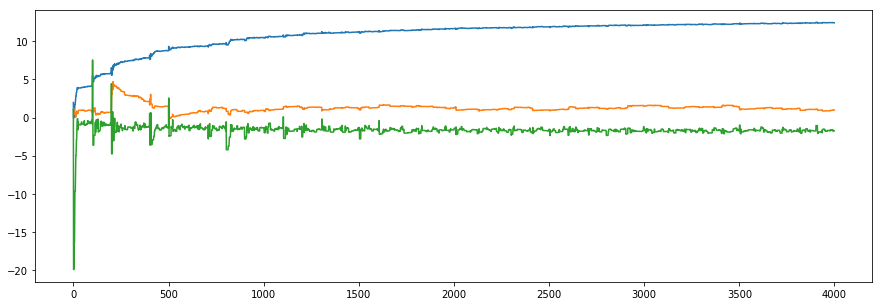

[13.37309125  1.19939947 -1.85886429]


In [13]:
weights_1 = stocGradAscent(data_arr, labels, 100)
print(weights_1)

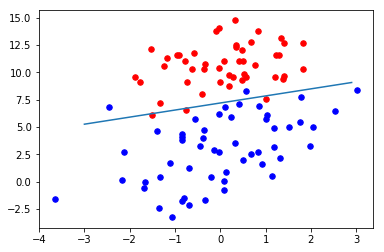

In [14]:
plt.scatter(x_0, y_0, s=30, c='red')
plt.scatter(x_1, y_1, s=30, c='blue')
x = np.arange(-3, 3, 0.1)
y = (-weights_1[0]-weights_1[1] * x )/weights_1[2]
plt.plot(x, y)
plt.show()

In [15]:
l = list(range(100))
print(l)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
